# Visualizations and stats by group type
- 1: Government teachers' groups
- 2: Meghshala groups
- 3: 321 groups

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

# Styling for Visualizationss
plt.style.use('default')
plt.rcParams["figure.figsize"] = [18, 10]
plt.rcParams["font.size"] = 12

In [21]:
df = pd.read_csv("../data/chkpt3/master.csv", index_col = 0)

In [22]:
df_gov = df[df.group_type == 1]
df_meg = df[df.group_type == 2]
df_tto = df[df.group_type == 3]

# 1. All Groups: message character length distributions

In [23]:
def filter_messages(df):

    df = df[df.translated_message.isna() == False] #Filters NaN
    df = df[df.translated_message != "This message was deleted"] #Filters deleted messages
    df = df[df.translated_message != "You deleted this message"] #Filters deleted messages
    
    return df

## 1.1 The most frequent messages

In [24]:
msg_gov = filter_messages(df_gov).translated_message
msg_meg = filter_messages(df_meg).translated_message
msg_tto = filter_messages(df_tto).translated_message

# print("Most frequent messages for gov: \n", msg_gov.value_counts()[:15])
# print("\n")
# print("Most frequent messages for meg: \n", msg_meg.value_counts()[:15])
# print("\n")
# print("Most frequent messages for tto: \n", msg_tto.value_counts()[:15])
# print("\n")

## 1.2 The distribution of messages by number of words

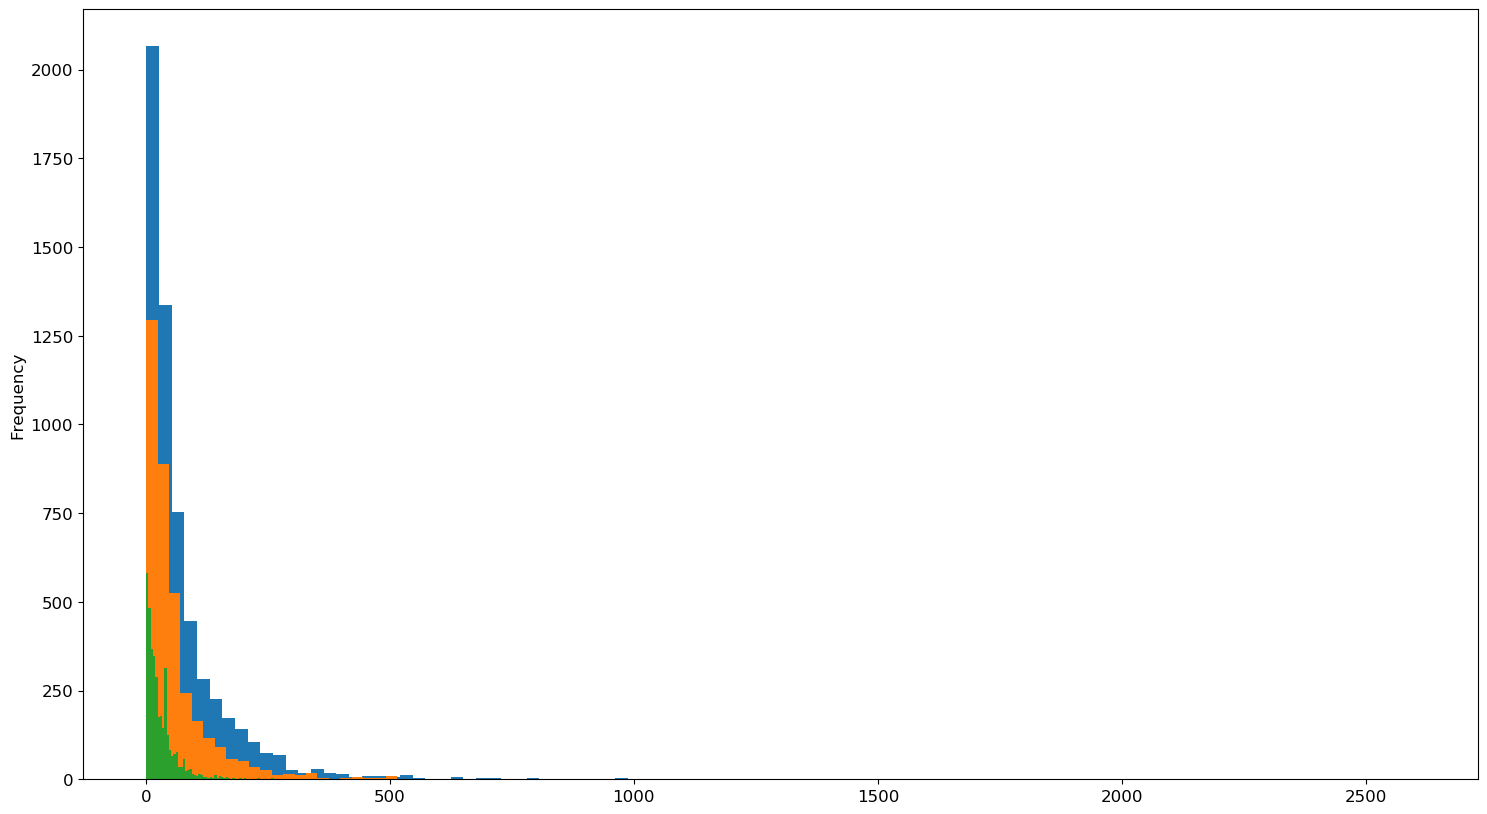

In [25]:
msg_gov.str.len().plot.hist(bins= 100)
msg_meg.str.len().plot.hist(bins= 100)
msg_tto.str.len().plot.hist(bins= 100)

# print("The distribution for gov: \n", msg_gov.str.len().describe())
# print("\n")
# print("The distribution for meg: \n", msg_meg.str.len().describe())
# print("\n")
# print("The distribution for tto: \n", msg_tto.str.len().describe())
# print("\n")

## 1.3 Transforming them by taking the logarithm

Text(0.5, 0, 'Log of character length')

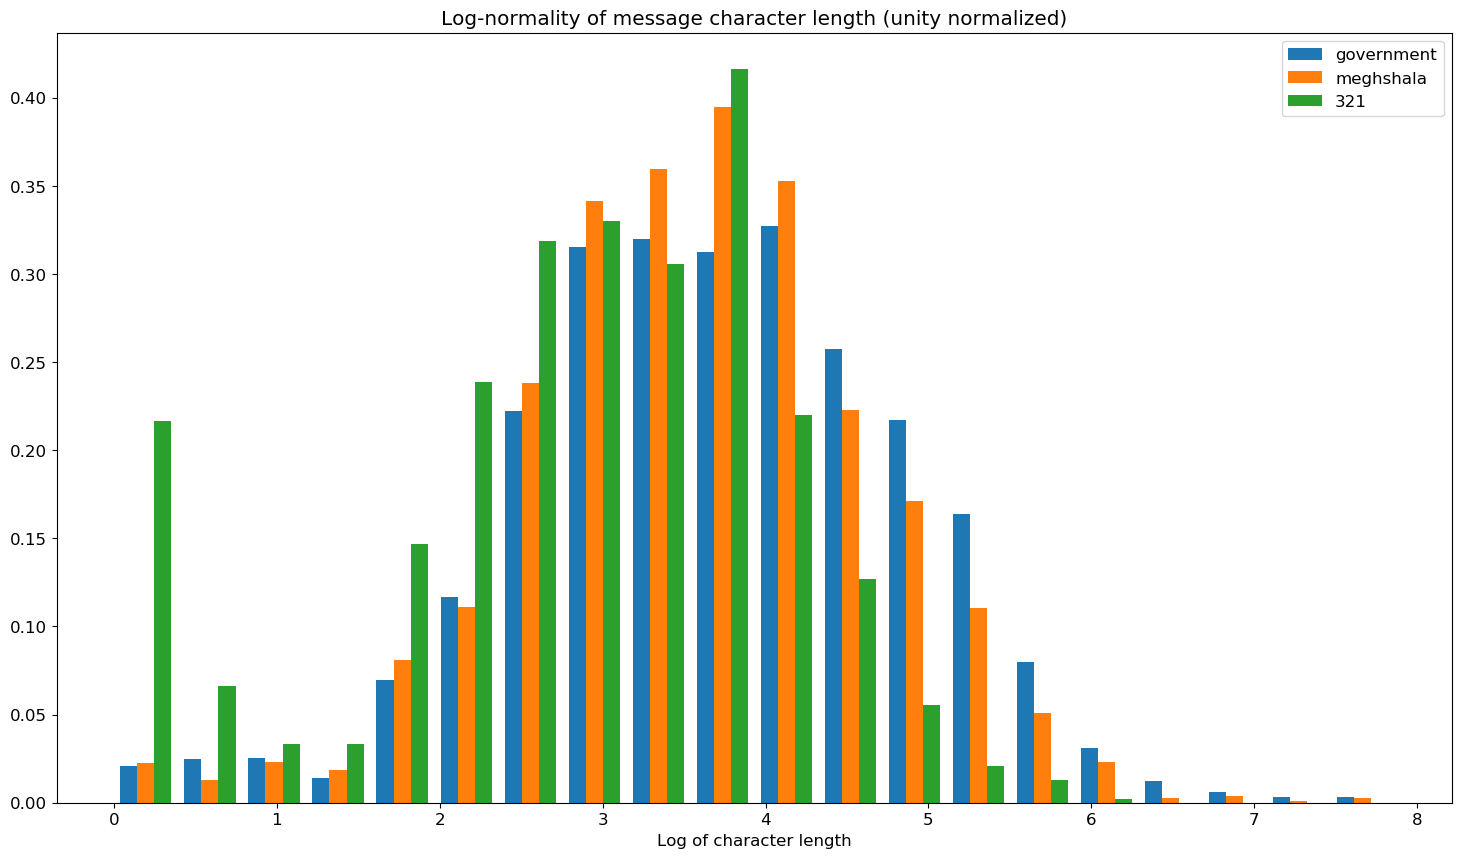

In [26]:
s_1 = np.log(msg_gov.str.len())
s_2 = np.log(msg_meg.str.len())
s_3 = np.log(msg_tto.str.len())

plt.hist([s_1, s_2, s_3], bins = 20, density = True)

plt.title("Log-normality of message character length (unity normalized)")
plt.legend(["government","meghshala", '321'])

plt.xlabel("Log of character length")

In [27]:
# Filtering out messages of length 1
gov_list = msg_gov.str.len().value_counts().drop(1)
meg_list = msg_meg.str.len().value_counts().drop(1)
tto_list = msg_tto.str.len().value_counts().drop(1)

In [28]:
# Filtering out messages of length 1
df_f = filter_messages(df)
criteria = df_f['translated_message'].apply(len) > 1
df_f = df_f[criteria]

rp.summary_cont(df_f['translated_message'].str.len().groupby(df_f['group_type']))

,N,Mean,SD,SE,95% Conf.,Interval
group_type,,,,,,
1,5828,79.770762,132.268481,1.732593,76.374588,83.166936
2,3568,64.724496,106.122946,1.776630,61.241814,68.207177
3,3372,34.597272,39.297227,0.676734,33.270676,35.923867


In [29]:
stats.kruskal(msg_gov.str.len(), 
              msg_meg.str.len(),
              msg_tto.str.len())

KruskalResult(statistic=1049.1808620655927, pvalue=1.4902891623891688e-228)

In [30]:
stats.f_oneway(np.log(gov_list), 
              np.log(meg_list),
              np.log(tto_list))

F_onewayResult(statistic=1.9677003280182825, pvalue=0.14037090220663412)

In [31]:
# TODO: Figure out why I wrote this line of code
#df = pd.read_csv("../data/chkpt3/master_dfname.csv", index_col = 0)

# 2. Analysis by group type

In [39]:
'''Fill the values below'''
parameter = 'time' #time or length
value = 60

## 2.1 Data visualization functions

In [40]:
def import_df(parameter, value):
    '''Helper function that imports csv for visualizations'''
    if parameter == 'time':
        return pd.read_csv("../data/conversation/time/" + str(value) + '.csv', index_col = 0)
    elif paramter == 'length':
        return pd.read_csv("../data/conversation/length/" + str(value) + '.csv', index_col = 0)
    else:
        print("Incorrect parameter given. Parameter is either 'time' or 'length'.")
        return None
    
def plot_message_count_distribution(parameter, value, bins = 25):
    # Frequency not density
    
    df = import_df(parameter, value)

    plt.rcParams["figure.figsize"] = [14, 7]
    plt.rcParams["font.size"] = 12

    df[df.group_type == 1].message_count.plot.hist(bins = bins)
    df[df.group_type == 2].message_count.plot.hist(bins = bins)
    df[df.group_type == 3].message_count.plot.hist(bins = bins)

    plt.title("Distribution of message counts in a given conversation across the three groups")
    plt.legend(["government","meghshala", '321'])

    plt.xlabel("Message Count")
    
def plot_normalized_message_count_distribution(parameter, value, bins = 20):   
    df = import_df(parameter, value)
    
    s_1 = df[df.group_type == 1].message_count.values.reshape(-1, 1)
    s_2 = df[df.group_type == 2].message_count.values.reshape(-1, 1)
    s_3 = df[df.group_type == 3].message_count.values.reshape(-1, 1)
    
    plt.hist([s_1, s_2, s_3], bins = bins, density = True)
    
    plt.title("Probability distribution of number of messages sent in a conversation")
    plt.legend(["government","meghshala", '321'])

    plt.xlabel("Message count")
    
def plot_hour_distribution(parameter, length, bins = 25):
    # Density
    
    df = import_df(parameter, value)
    
    s_1 = df[df.group_type == 1].hour.values.reshape(-1, 1)
    s_2 = df[df.group_type == 2].hour.values.reshape(-1, 1)
    s_3 = df[df.group_type == 3].hour.values.reshape(-1, 1)
    
    plt.hist([s_1, s_2, s_3], density = True, bins = range(0, 25, 1))
    
    plt.title("Probability distribution of a conversation started in a given hour")
    plt.legend(["government","meghshala", '321'])

    plt.xlabel("Hour of the day")  
#     plt.xticks(np.arange(-1, 24, step = 1))
    plt.xlim([0, 24])

    a = plt.axes()
    a.xaxis.set_major_formatter(ticker.NullFormatter())
    a.set_xticklabels('')
    a.set_xticks(np.arange(0.5,24.5, 1), minor=True)
    a.set_xticklabels(np.arange(0, 24, 1), minor=True)
    
def plot_day_distribution(parameter, length):
    # Density
    
    df = import_df(parameter, value)
    
    s_1 = df[df.group_type == 1].day.values.reshape(-1, 1)
    s_2 = df[df.group_type == 2].day.values.reshape(-1, 1)
    s_3 = df[df.group_type == 3].day.values.reshape(-1, 1)
    
    plt.hist([s_1, s_2, s_3], density = True, bins = range(0, 8, 1))
    
    plt.title("Probability distribution of conversations started on a given day of the week")
    plt.legend(["government","meghshala", '321'])

    plt.xlabel("Day of the week") 
    plt.xlim([0, 7])

    a = plt.axes()
    a.xaxis.set_major_formatter(ticker.NullFormatter())
    a.set_xticklabels('')
    a.set_xticks(np.arange(0.5,7.5, 1), minor=True)
    a.set_xticklabels(np.arange(1, 8, 1), minor=True)
    
def scatter_plot_message_count_engagement(parameter, length):
    # Density
    
    df = import_df(parameter, value)
    
    x_1 = df[df.group_type == 1].message_count.values.reshape(-1, 1)
    x_2 = df[df.group_type == 2].message_count.values.reshape(-1, 1)
    x_3 = df[df.group_type == 3].message_count.values.reshape(-1, 1)
    
    y_1 = df[df.group_type == 1].response_rate.values.reshape(-1, 1)
    y_2 = df[df.group_type == 2].response_rate.values.reshape(-1, 1)
    y_3 = df[df.group_type == 3].response_rate.values.reshape(-1, 1)
    
    plt.scatter(x_1, y_1)
    plt.scatter(x_2, y_2)
    plt.scatter(x_3, y_3)
    
    plt.title("Scatter plot of response rate vs. number of messages sent in a conversation")
    plt.legend(["government","meghshala", '321'])
    plt.ylabel("Response rate")
    
def box_plot_hour_engagement(parameter, length):
    df = import_df(parameter, value)
    df = df[df.hour > 7]
    
    sns.boxplot(x="hour", y='response_rate', hue = 'group_type', data=df)

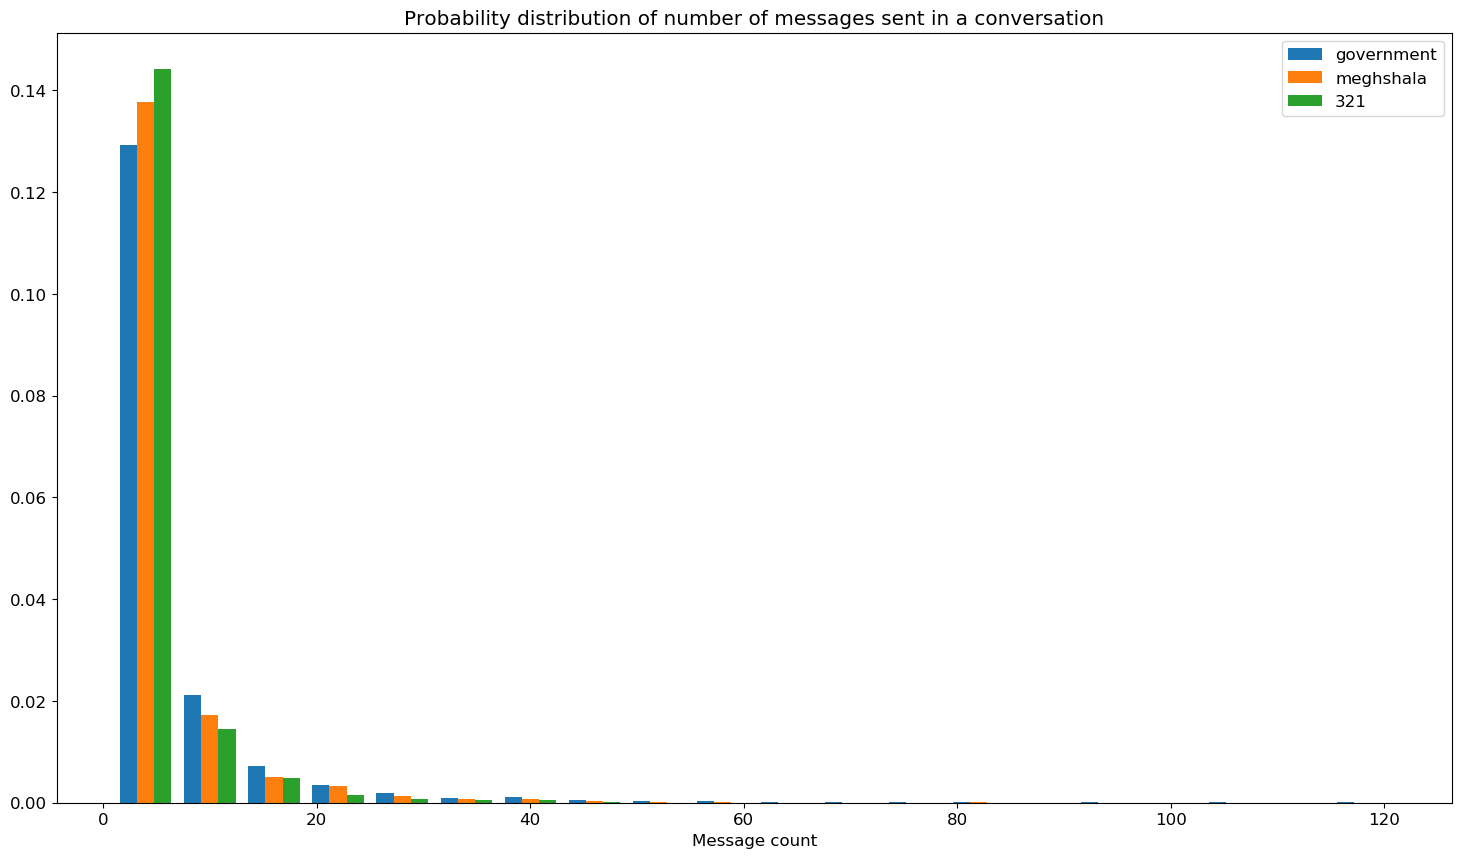

In [41]:
plot_normalized_message_count_distribution(parameter, value)

/Users/noel/anaconda3/envs/spec_project/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


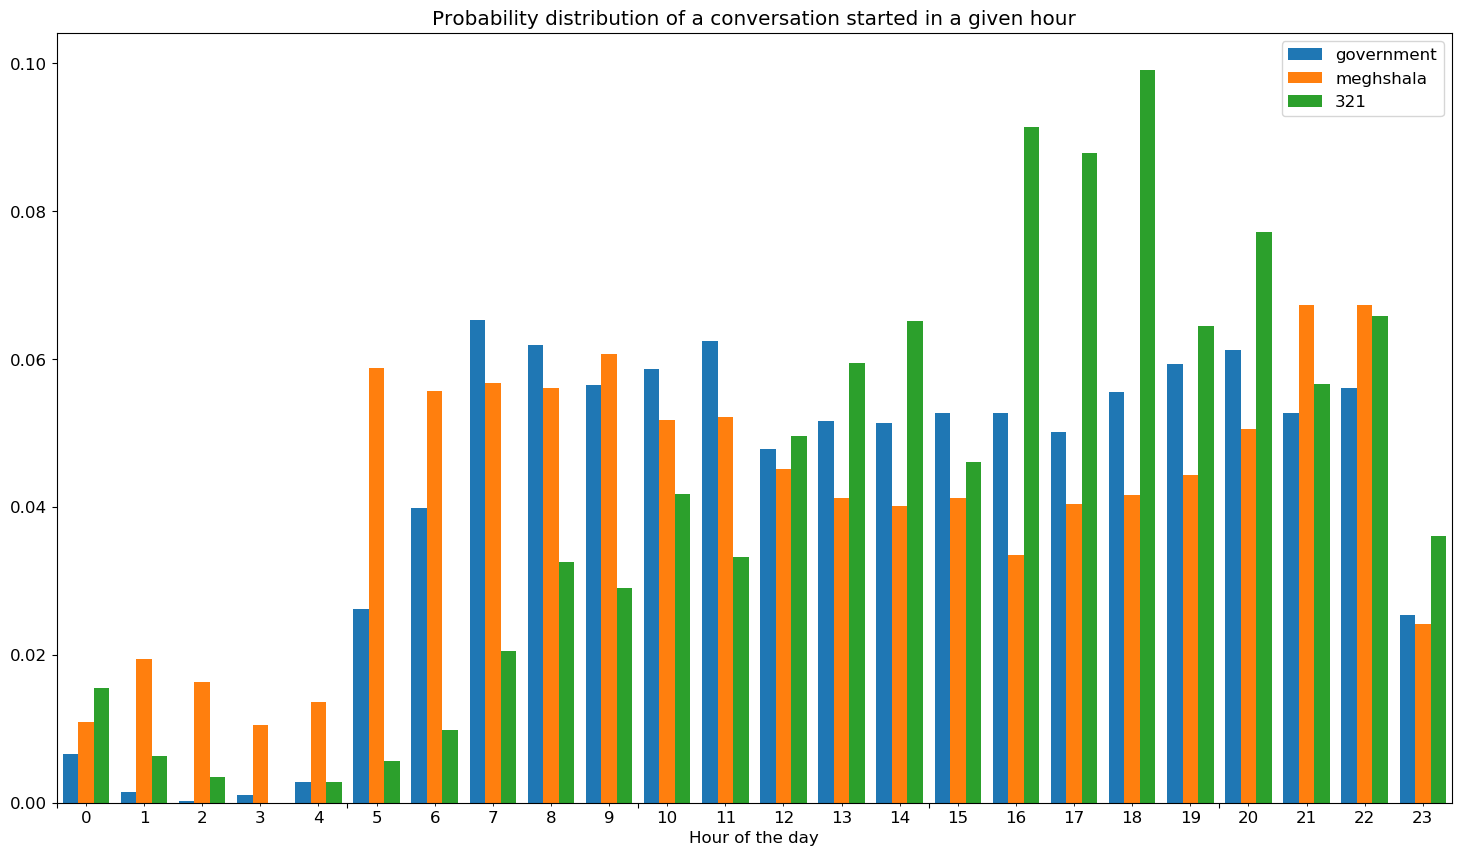

In [42]:
plot_hour_distribution(parameter, value)

/Users/noel/anaconda3/envs/spec_project/lib/python3.7/site-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


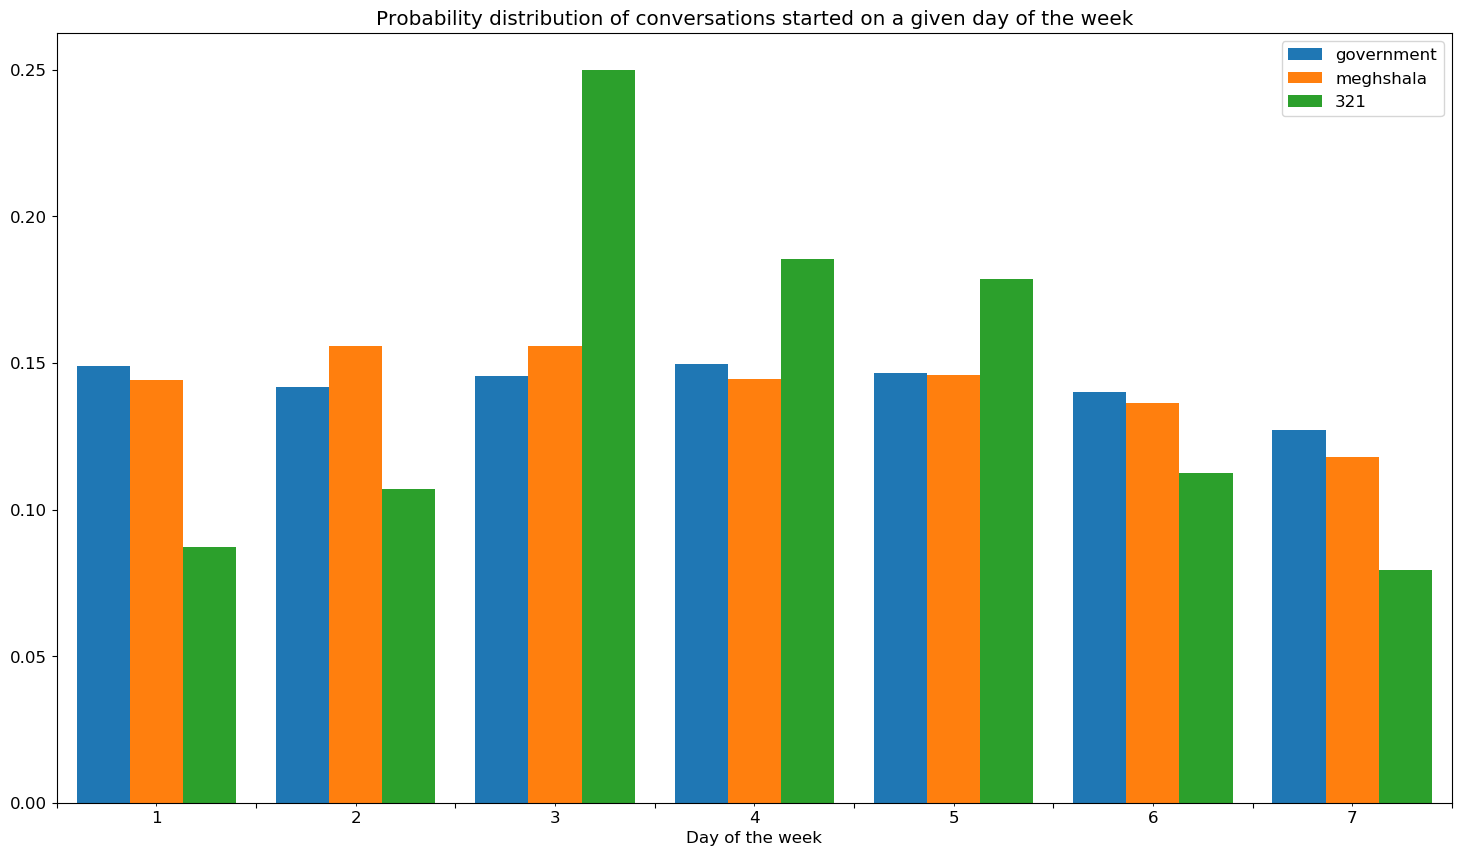

In [43]:
plot_day_distribution(parameter, value)

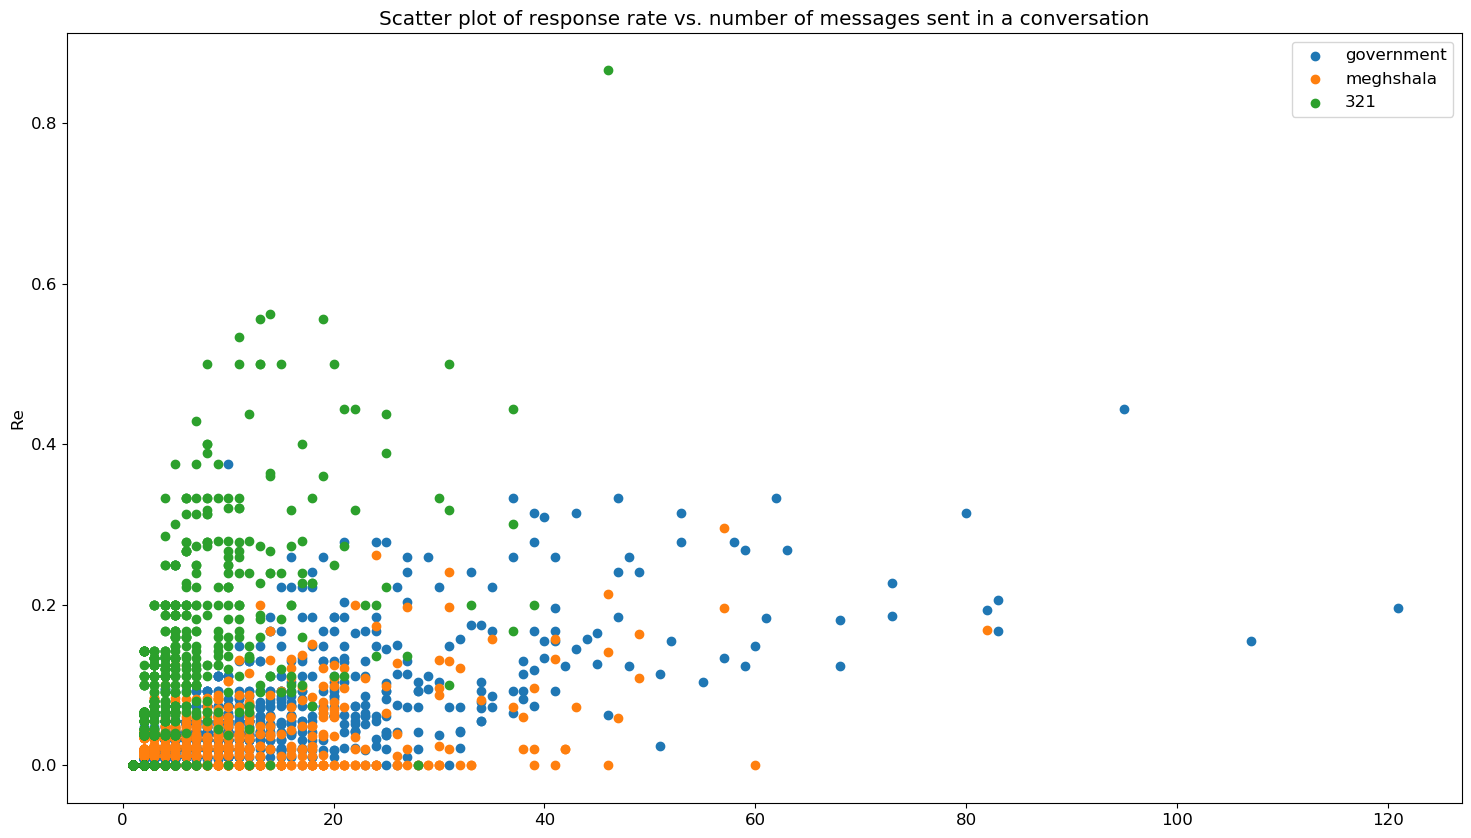

In [44]:
scatter_plot_message_count_engagement(parameter, value)

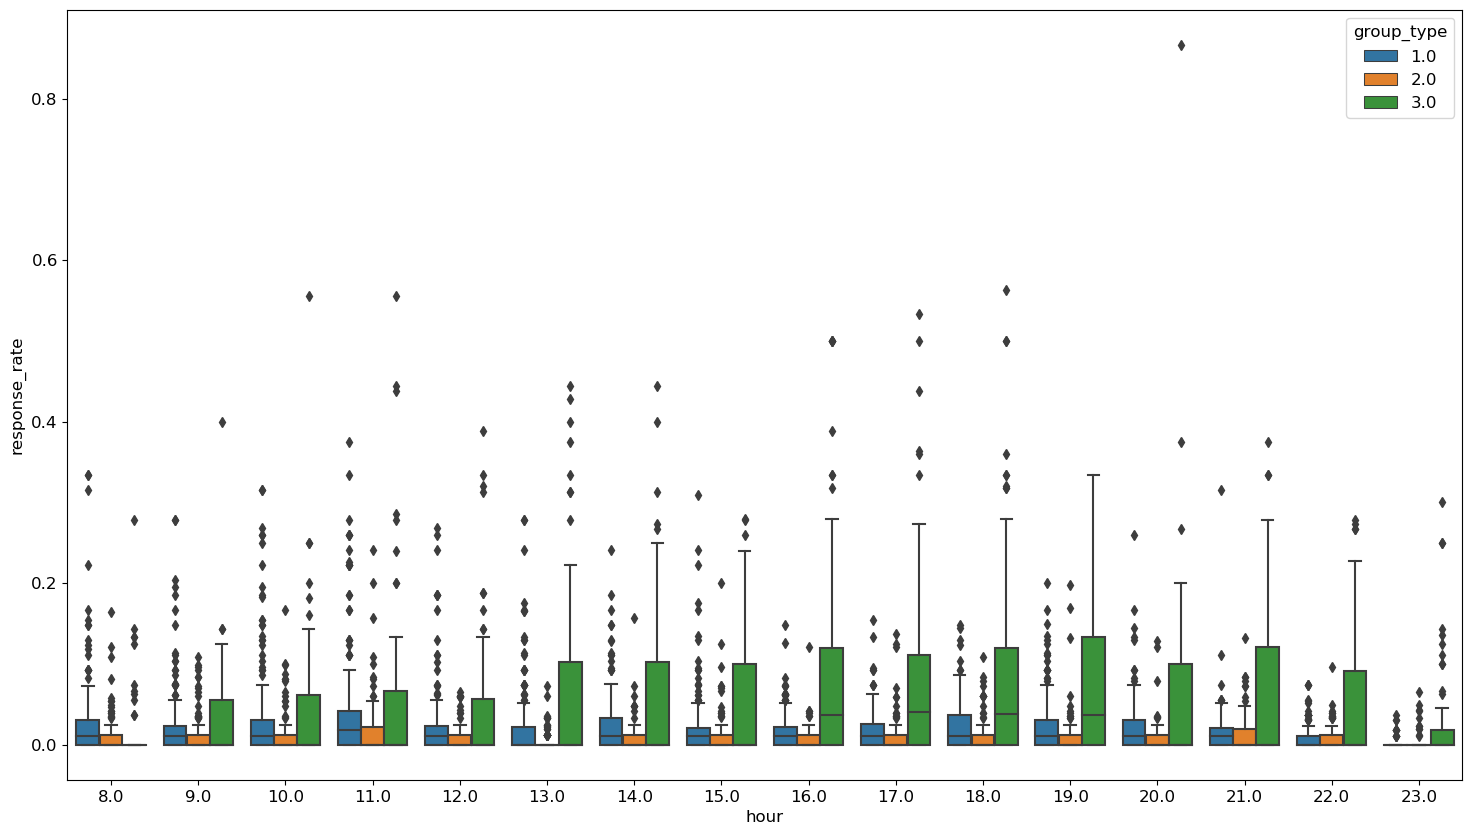

In [45]:
box_plot_hour_engagement(parameter, value)